**British Airways Review Final Code**

**Allen Li and Sherzod Bobojonov**

***Question 1: What is the overall sentiment of British Airways?***

In [1]:
import pandas as pd
import re
df = pd.read_csv("BA_AirlineReviews.csv", encoding = "latin-1")
df.drop(labels = ["Unnamed: 0"], axis = 1, inplace = True) #Drop the column counting the row number
df.ReviewBody=[re.sub("http\S+", " ", s) for s in df.ReviewBody]

In [5]:
counts = df['Recommended'].value_counts()
print(counts)

Recommended
no     2203
yes    1498
Name: count, dtype: int64


*Large Language Model (LLM)*

In [1]:
import pandas as pd
df_llm = pd.read_csv("BA_AirlineReviews.csv", encoding = "latin-1")
df_llm.drop(labels = ["Unnamed: 0"], axis = 1, inplace = True)
df_llm.head()

,OverallRating,ReviewHeader,Name,Datetime,VerifiedReview,ReviewBody,TypeOfTraveller,SeatType,Route,DateFlown,SeatComfort,CabinStaffService,GroundService,ValueForMoney,Recommended,Aircraft,Food&Beverages,InflightEntertainment,Wifi&Connectivity
0,1.0,"""Service level far worse then Ryanair""",L Keele,19th November 2023,True,4 Hours before takeoff we received a Mail stat...,Couple Leisure,Economy Class,London to Stuttgart,23-Nov,1.0,1.0,1.0,1.0,no,NaN,NaN,NaN,NaN
1,3.0,"""do not upgrade members based on status""",Austin Jones,19th November 2023,True,I recently had a delay on British Airways from...,Business,Economy Class,Brussels to London,23-Nov,2.0,3.0,1.0,2.0,no,A320,1.0,2.0,2.0
2,8.0,"""Flight was smooth and quick""",M A Collie,16th November 2023,False,"Boarded on time, but it took ages to get to th...",Couple Leisure,Business Class,London Heathrow to Dublin,23-Nov,3.0,3.0,4.0,3.0,yes,A320,4.0,NaN,NaN
3,1.0,"""Absolutely hopeless airline""",Nigel Dean,16th November 2023,True,"5 days before the flight, we were advised by B...",Couple Leisure,Economy Class,London to Dublin,22-Dec,3.0,3.0,1.0,1.0,no,NaN,NaN,NaN,NaN
4,1.0,"""Customer Service is non existent""",Gaylynne Simpson,14th November 2023,False,"We traveled to Lisbon for our dream vacation, ...",Couple Leisure,Economy Class,London to Lisbon,23-Nov,1.0,1.0,1.0,1.0,no,NaN,1.0,1.0,1.0


In [2]:
from transformers import pipeline
classifier = pipeline(model="jdhr/AirlineTweetAnalysis-RoBERTa") #Initialize a classifier 
output = classifier(list(df_llm["ReviewHeader"]))

In [3]:
negative_count = sum(1 for result in output if result['label'] == 'negative')
neutral_count = sum(1 for result in output if result['label'] == 'neutral')
positive_count = sum(1 for result in output if result['label'] == 'positive')
print("The number of predicted positive reviews is", positive_count)
print("The number of predicted neutral reviews is", neutral_count)
print("The number of predicted negative reviews is", negative_count)

The number of predicted positive reviews is 199
The number of predicted neutral reviews is 1278
The number of predicted negative reviews is 2224


***Question 2: What are the most frequent terms related to people recommending or not recommending British Airways?***

In [5]:
df_rec = df[df['Recommended'] == 'yes']
df_norec = df[df['Recommended'] == 'no']

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
import nltk
nltk_stopwords = nltk.corpus.stopwords.words("english")
vectorizer=CountVectorizer(stop_words=nltk_stopwords, ngram_range = (2,2))
DTM_rec = vectorizer.fit_transform(df_rec["ReviewBody"])
DTM_rec.shape

(1498, 72026)

In [8]:
dffreq = pd.DataFrame({'Term': vectorizer.get_feature_names_out(),
                   'Frequency': DTM_rec.sum(axis=0).tolist()[0]
                  })
dffreq.sort_values(by="Frequency",inplace=True,ascending=False)
dffreq.reset_index(inplace=True,drop=True)
dffreq = dffreq.drop(dffreq.index[:2]) #Remove first two rows (British Airways and London Heathrow)

#Check your answer:
dffreq.head(10)

,Term,Frequency
2,cabin crew,424
3,business class,290
4,club world,242
5,premium economy,163
6,club europe,159
7,london gatwick,140
8,first class,125
9,long haul,113
10,return flight,112
11,leg room,108


In [9]:
from sklearn.feature_extraction.text import CountVectorizer
import nltk
nltk_stopwords = nltk.corpus.stopwords.words("english")
vectorizer=CountVectorizer(stop_words=nltk_stopwords, ngram_range = (2,2))
DTM_norec = vectorizer.fit_transform(df_norec["ReviewBody"])
DTM_norec.shape

(2203, 133686)

In [10]:
dffreq = pd.DataFrame({'Term': vectorizer.get_feature_names_out(),
                   'Frequency': DTM_norec.sum(axis=0).tolist()[0]
                  })
dffreq.sort_values(by="Frequency",inplace=True,ascending=False)
dffreq.reset_index(inplace=True,drop=True)
dffreq = dffreq.drop(dffreq.index[:2]) #Remove first two rows (British Airways and London Heathrow)

#Check your answer:
dffreq.head(10)

,Term,Frequency
2,business class,810
3,cabin crew,431
4,customer service,367
5,premium economy,221
6,first class,207
7,return flight,192
8,long haul,183
9,hour flight,159
10,club europe,154
11,via london,145


***Word Cloud***

In [14]:
import nltk
from sklearn.feature_extraction.text import CountVectorizer
nltk_stopwords = nltk.corpus.stopwords.words("english") 
vectorizer = CountVectorizer(stop_words=nltk_stopwords,ngram_range = (2,2))
DTM =vectorizer.fit_transform(df["ReviewBody"])
dffreq = pd.DataFrame({'Term': vectorizer.get_feature_names_out(),
                   'Frequency': DTM.sum(axis=0).tolist()[0]
                  })

dffreq.sort_values(by="Frequency",inplace=True,ascending=False)
dffreq.reset_index(inplace=True,drop=True)
dffreq = dffreq.drop(dffreq.index[:2]) #Remove first two rows (British Airways and London Heathrow)

,Term,Frequency
2,business class,1100
3,cabin crew,855
4,customer service,407
5,premium economy,384
6,club world,382


In [15]:
dictfreq = dict(zip(dffreq.Term,dffreq.Frequency))

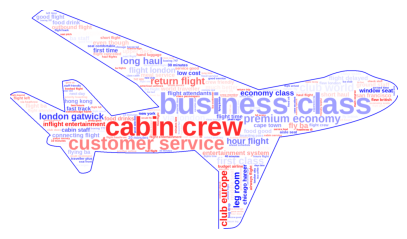

In [227]:
# Your answer here:
from wordcloud import WordCloud
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
#This traslates image to data array in RGB scales.
moneybag_mask = np.array(Image.open("airplane.final.png")) 
wordcloud = WordCloud(width = 800, height = 800, 
                font_path="Arimo-Bold",
                background_color ='white',
                prefer_horizontal=0.9,  
                colormap='bwr', 
                mask=moneybag_mask,
                contour_width=2,
                contour_color='blue',      
                random_state = 2021)
wordcloud.generate_from_frequencies(frequencies=dictfreq) 
plt.figure(figsize = (5, 5)) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.show() 

#Check your answer:
plt.show() 

***Question 3: What are the terms contributing most to people recommending or not recommending British Airways?***

*Logisitic Regression Cross Validation*

In [6]:
import pandas as pd
df2 = pd.read_csv("BA_AirlineReviews.csv", encoding = "latin-1")
df2.drop(labels = ["Unnamed: 0"], axis = 1, inplace = True)
df2["ReviewBody"]=["Review: "+s for s in df2["ReviewBody"]]  #Add "Message: " to avoid empty message. 

In [11]:
#Your answer here:
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df2, test_size=0.3, random_state=2021)
df_train.reset_index(drop=True,inplace=True)
df_test.reset_index(drop=True,inplace=True)


stemmer = nltk.stem.SnowballStemmer("english", ignore_stopwords=True)
class StemmedTfidfVectorizer(TfidfVectorizer):
    def build_analyzer(self):
        analyzer = super(StemmedTfidfVectorizer, self).build_analyzer()
        return lambda doc: ([stemmer.stem(w) for w in analyzer(doc)])

class StemmedCountVectorizer(CountVectorizer):
    def build_analyzer(self):
        analyzer = super(StemmedCountVectorizer, self).build_analyzer()
        return lambda doc: ([stemmer.stem(w) for w in analyzer(doc)])
    
nltk_stopwords = nltk.corpus.stopwords.words("english") 
vectorizer=TfidfVectorizer(stop_words=nltk_stopwords, norm=None)

#Create the training DTM and the labels
train_x = vectorizer.fit_transform(df_train["ReviewBody"])
train_y = df_train["Recommended"]

test_x = vectorizer.transform(df_test["ReviewBody"])
test_y = df_test["Recommended"]

#Check your answer
print(train_x.shape)
print(test_x.shape)

(2590, 12156)
(1111, 12156)


In [12]:
# You answer here:
from sklearn.svm import l1_min_c
import numpy as np
param_grid = l1_min_c(train_x, train_y, loss='log') * np.logspace(start=0, stop=5, num=20) 
from sklearn.linear_model import LogisticRegressionCV
sparselr_cv = LogisticRegressionCV(penalty='l1', 
                                solver='liblinear', 
                                Cs=param_grid,   #Use the grid generated above
                                cv=5,            #Number of folds, that is, K
                                scoring='roc_auc', #The performance metric to select the best C.
                                random_state=2021,  #To make sure the result is reproducible
                                tol=0.001,
                                max_iter=1000)
sparselr_cv.fit(train_x,train_y)


#Performance evaluation.
from sklearn.metrics import accuracy_score, roc_auc_score
print("Train Accuracy:")
print(accuracy_score(train_y,sparselr_cv.predict(train_x)))
print("Test Accuracy:")
print(accuracy_score(test_y,sparselr_cv.predict(test_x)))
print("Train AUC:")
print(roc_auc_score(train_y,sparselr_cv.predict_proba(train_x)[:, 1]))
print("Test AUC:")
print(roc_auc_score(test_y,sparselr_cv.predict_proba(test_x)[:, 1]))

Train Accuracy:
0.9370656370656371
Test Accuracy:
0.8802880288028803
Train AUC:
0.9840139418020838
Test AUC:
0.9382216459669716


In [40]:
#Your answer here:
dfbeta = pd.DataFrame({'Term': vectorizer.get_feature_names_out(),
                       'Beta': sparselr_cv.coef_[0]
                     })
dfbeta.sort_values(by="Beta",inplace=True,ascending=True)
dfbeta.reset_index(inplace=True,drop=True)

#Check your answer:
dfbeta.head(15)

,Term,Beta
0,uncomfortable,-0.266733
1,terrible,-0.256807
2,worst,-0.236785
3,customers,-0.199425
4,told,-0.191164
5,appalling,-0.187778
6,rude,-0.186843
7,awful,-0.172444
8,never,-0.172412
9,disappointed,-0.156480


In [41]:
#Your answer here:
dfbeta.sort_values(by="Beta",inplace=True,ascending=False)
dfbeta.reset_index(inplace=True,drop=True)

#Check your answer:
dfbeta.head(15)

,Term,Beta
0,good,0.469479
1,excellent,0.394896
2,comfortable,0.323291
3,thank,0.314530
4,great,0.251451
5,attentive,0.186699
6,friendly,0.176293
7,happy,0.175135
8,efficient,0.174917
9,professional,0.172511


*XGBoost*

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
import nltk 
import numpy as np
from sklearn.svm import l1_min_c
from sklearn.linear_model import LogisticRegressionCV
from xgboost import XGBClassifier
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV   

In [20]:
#Your answer here:
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df2, test_size=0.3, random_state=2021)
df_train.reset_index(drop=True,inplace=True)
df_test.reset_index(drop=True,inplace=True)


stemmer = nltk.stem.SnowballStemmer("english", ignore_stopwords=True)
class StemmedTfidfVectorizer(TfidfVectorizer):
    def build_analyzer(self):
        analyzer = super(StemmedTfidfVectorizer, self).build_analyzer()
        return lambda doc: ([stemmer.stem(w) for w in analyzer(doc)])

class StemmedCountVectorizer(CountVectorizer):
    def build_analyzer(self):
        analyzer = super(StemmedCountVectorizer, self).build_analyzer()
        return lambda doc: ([stemmer.stem(w) for w in analyzer(doc)])
    
nltk_stopwords = nltk.corpus.stopwords.words("english") 
vectorizer=TfidfVectorizer(stop_words=nltk_stopwords, norm=None)

#Create the training DTM and the labels
train_x = vectorizer.fit_transform(df_train["ReviewBody"])
train_y = df_train["Recommended"]

test_x = vectorizer.transform(df_test["ReviewBody"])
test_y = df_test["Recommended"]

#Check your answer
print(train_x.shape)
print(test_x.shape)

(2590, 12156)
(1111, 12156)


In [21]:
#Your answer here:
le = preprocessing.LabelEncoder()
train_y=le.fit_transform(train_y)
test_y=le.transform(test_y)

param_list = {  
 'max_depth':[3, 5, 10],       #Candidate for max_depth
 'n_estimators':[200, 300, 500]  #Candidate for n_estimators
}
xgb=XGBClassifier(nthread=-1,           #Multi-thread speed up
                  #use_label_encoder=False,  #To avoid an unimportant warning message 
                  verbosity = 0,       #Hidden other messages during training
                  random_state=2021) 
xgb = GridSearchCV(estimator = xgb, 
                   param_grid = param_list,
                   scoring = 'roc_auc',  #The performance metric to select the best parameters.
                   cv=5                   #Number of folds, i.e., K
                  )  
xgb.fit(train_x, train_y)

#Check your answer:
xgb

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, nthread=-1,
                                     num_parallel_tree=None, ...),
             param_grid={'max_depth': [3, 5, 10],
                         'n_estimators': [200, 300, 500]},
             scoring='roc_auc')

In [22]:
xgb.best_params_

{'max_depth': 5, 'n_estimators': 200}

In [23]:
#Your answer here:
print("Train Accuracy:")
print(accuracy_score(train_y,xgb.predict(train_x)))
print("Test Accuracy:")
print(accuracy_score(test_y,xgb.predict(test_x)))
print("Train AUC:")
print(roc_auc_score(train_y,xgb.predict_proba(train_x)[:, 1]))
print("Test AUC:")
print(roc_auc_score(test_y,xgb.predict_proba(test_x)[:, 1]))

Train Accuracy:
1.0
Test Accuracy:
0.873987398739874
Train AUC:
1.0
Test AUC:
0.9365429234338749


In [25]:
#Your answer here:
xgb=XGBClassifier(max_depth=5,
                  n_estimators=200,
                  nthread=4,
                  #use_label_encoder=False,
                  verbosity = 0,
                  random_state=2021
                 )
xgb.fit(train_x, train_y)
xgb.feature_importances_

dfbeta = pd.DataFrame({'Term': vectorizer.get_feature_names_out(),
                       'Importance': xgb.feature_importances_
                     })
dfbeta.sort_values(by="Importance",inplace=True,ascending=False)
dfbeta.reset_index(inplace=True,drop=True)
dfbeta.head(10)

#Check your answer:
dfbeta.head(15)

,Term,Importance
0,told,0.030594
1,good,0.015801
2,comfortable,0.015524
3,call,0.013932
4,customer,0.013851
5,excellent,0.012950
6,airline,0.011030
7,another,0.010748
8,worst,0.010461
9,years,0.009857


*Test on Fake Reviews*

In [140]:
fake_reviews = [
    "I recently flew with British Airways and found the experience to be generally positive. The flight attendants were polite and the seats were reasonably comfortable for the duration of the journey. However, there were some minor issues with the in-flight entertainment.",
    
    "My experience with British Airways was somewhat disappointing. While the flight departed on time and the cabin crew were courteous, the seats felt a bit cramped and the food options were limited. It was not terrible, but there is certainly room for improvement.",
    
    "I flew with British Airways recently and it was an okay experience. The check-in process was smooth, but I found the legroom in the seats to be somewhat lacking. The service onboard was decent, but not exceptional.",
    
    "My recent flight with British Airways left a bit to be desired. While the seats were adequate in comfort and the in-flight service was satisfactory, I was disappointed by the lack of complimentary snacks.",
    
    "I had a somewhat positive experience flying with British Airways. The flight was uneventful, the staff were courteous, and the overall journey was acceptable. However, there was nothing particularly exceptional about it either."
]


In [141]:
DTM_new = vectorizer.transform(fake_reviews)
sparselr_cv.predict(DTM_new)

array(['yes', 'no', 'yes', 'yes', 'no'], dtype=object)

In [142]:
xgb.predict(DTM_new)

array([1, 0, 1, 1, 1])

***Question 4: Are certain cabin types or flight routes more inclined to comment about specific aspects of British Airways’ service?***

In [2]:
import pandas as pd
rows = ["SeatType", "ReviewBody"]
df3 = df[["SeatType", "ReviewBody", "Route"]]
df3.head()

,SeatType,ReviewBody,Route
0,Economy Class,4 Hours before takeoff we received a Mail stat...,London to Stuttgart
1,Economy Class,I recently had a delay on British Airways from...,Brussels to London
2,Business Class,"Boarded on time, but it took ages to get to th...",London Heathrow to Dublin
3,Economy Class,"5 days before the flight, we were advised by B...",London to Dublin
4,Economy Class,"We traveled to Lisbon for our dream vacation, ...",London to Lisbon


In [3]:
#Preliminary codes:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, test_size=0.33, random_state=2021)

import nltk
from sklearn.feature_extraction.text import CountVectorizer
stemmer = nltk.stem.SnowballStemmer("english")
class StemmedCountVectorizer(CountVectorizer):
    def build_analyzer(self):
        analyzer = super(StemmedCountVectorizer, self).build_analyzer()
        return lambda doc: ([stemmer.stem(w) for w in analyzer(doc)])

nltk_stopwords = nltk.corpus.stopwords.words("english")
vectorizer = StemmedCountVectorizer(stop_words=nltk_stopwords, max_features=200)

#You answer here:

train_x = vectorizer.fit_transform(df_train['ReviewBody'])
test_x = vectorizer.transform(df_test['ReviewBody']) 

#Check your answer:
print(train_x.shape)
print(test_x.shape)

(2479, 200)
(1222, 200)


2
3
4
5
6
7


Text(0, 0.5, 'Perplexity')

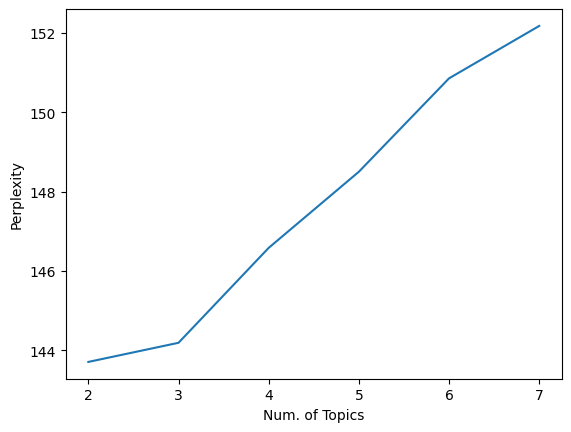

In [4]:
#You answer here:
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_jobs=-1,   
                                max_iter=50,   
                                random_state=2021 
                               )

num_topics=range(2,8)
perplexity=[]
for i in num_topics:
    print(i)
    lda.set_params(n_components=i)
    lda.fit(train_x)
    perplexity.append(lda.perplexity(test_x))
perplexity
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(num_topics, perplexity)
plt.xlabel('Num. of Topics')
plt.ylabel('Perplexity')

In [5]:
#You answer here:
DTM =vectorizer.fit_transform(df['ReviewBody']) 

lda = LatentDirichletAllocation(n_components=2,
                                n_jobs=-1,   
                                max_iter=50,   
                                random_state=2021 
                               )
lda.fit(DTM)

#Check your answer
lda

LatentDirichletAllocation(max_iter=50, n_components=2, n_jobs=-1,
                          random_state=2021)

In [6]:
#You answer here:
import numpy as np
from sklearn import preprocessing
temparray = preprocessing.normalize(lda.components_,norm="l1")
TTopicM = pd.DataFrame(np.transpose(temparray), index = vectorizer.get_feature_names_out())

#Check your answer
TTopicM.head()

,0,1
10,0.002562,0.002054
30,0.002103,0.001916
a380,0.000012,0.003879
air,0.002296,0.002034
aircraft,0.000685,0.009397


In [7]:
#You answer here:
TermOfTopic =pd.DataFrame([])
for i in range(TTopicM.shape[1]):
    TermOfTopic[i]=(list(TTopicM.sort_values(by=i,ascending=False).iloc[:10,i].index))
TermOfTopic

#Check your answer
TermOfTopic

,0,1
0,flight,flight
1,ba,seat
2,airway,london
3,british,crew
4,seat,food
5,airlin,good
6,get,heathrow
7,class,cabin
8,hour,ba
9,servic,servic


In [8]:
DTopicM = pd.DataFrame(lda.transform(DTM))
dfnew = pd.concat([df3, DTopicM], axis=1)

#Chek your answer
dfnew.head()

,SeatType,ReviewBody,Route,0,1
0,Economy Class,4 Hours before takeoff we received a Mail stat...,London to Stuttgart,0.801973,0.198027
1,Economy Class,I recently had a delay on British Airways from...,Brussels to London,0.622953,0.377047
2,Business Class,"Boarded on time, but it took ages to get to th...",London Heathrow to Dublin,0.135932,0.864068
3,Economy Class,"5 days before the flight, we were advised by B...",London to Dublin,0.990006,0.009994
4,Economy Class,"We traveled to Lisbon for our dream vacation, ...",London to Lisbon,0.828811,0.171189


In [9]:
#Your answer here:
dfnew.sort_values(by=0,ascending=False,inplace=True)
dfnew.reset_index(inplace=True,drop=True)

#Chek your answer
dfnew.head(10)

,SeatType,ReviewBody,Route,0,1
0,Economy Class,Hong Kong to Copenhagen via London. The whole ...,Hong Kong to Copenhagen via London,0.994836,0.005164
1,Business Class,I booked flights to Rome from the US and then ...,Rome to Los Angeles via London,0.993408,0.006592
2,Economy Class,"BA cancelled my flight, I never got on it, cou...",Hong Kong to London,0.992161,0.007839
3,Economy Class,On my flight from Los Angeles to London Heathr...,London Heathrow to Los Angeles,0.991966,0.008034
4,Economy Class,"I booked a non-refundable round trip ticket, N...",New York JFK to London,0.991965,0.008035
5,Economy Class,San Diego to Hannover via London. I booked on ...,San Diego to Hannover via London,0.991895,0.008105
6,Economy Class,London to Montreal. Very bad service with dela...,London to Montreal,0.991801,0.008199
7,Premium Economy,"Shanghai to Zurich via London return, and Brit...",Shanghai to Zurich via London Heathrow,0.991627,0.008373
8,Business Class,My daughter and I were denied boarding on our ...,Madrid to Vancouver via London,0.991053,0.008947
9,Economy Class,Vancouver to Delhi via London. We were booked ...,Vancouver to Delhi via London,0.990908,0.009092


In [10]:
#Your answer here:
dfnew.sort_values(by=1,ascending=False,inplace=True)
dfnew.reset_index(inplace=True,drop=True)

#Chek your answer
dfnew.head(10)

,SeatType,ReviewBody,Route,0,1
0,Business Class,Check in and security at London Heathrow effic...,London to Los Angeles,0.008559,0.991441
1,Business Class,Toronto to London in WTP on a 787 and London t...,NaN,0.008923,0.991077
2,Business Class,Gatwick to Faro. Club check in at Gatwick is v...,Gatwick to Faro,0.009263,0.990737
3,Economy Class,London Heathrow-Amsterdam-London Heathrow chec...,London Heathrow to Amsterdam,0.009511,0.990489
4,Economy Class,London Gatwick-JER-London Gatwick day trip on ...,NaN,0.010980,0.989020
5,Business Class,Return flights from Newcastle to Geneva via Lo...,Newcastle to Geneva via London,0.011320,0.988680
6,Economy Class,Flew Atlanta to London Heathrow 8th Jan 2023. ...,Atlanta to London,0.011335,0.988665
7,First Class,SAT-Dallas-London Heathrow-Brussels: First Fir...,NaN,0.011973,0.988027
8,Economy Class,"Domestic BA from London and Edinburgh return, ...",London Heathrow to Edinburgh,0.012693,0.987307
9,Economy Class,Travelled in party of four with prebooked seat...,London Heathrow to Johannesburg,0.013000,0.987000


***Miscellaneous (For Presentation)***

In [20]:
counts = df_llm['SeatType'].value_counts()
print(counts)

SeatType
Economy Class      1927
Business Class     1198
Premium Economy     361
First Class         213
Name: count, dtype: int64
